In [19]:
from fair_cc_functions import *
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# generates unfair and corresponding fair graph, computes clusters for these graphs and their costs
# for all amount of nodes from 4 to n with 10 iterations by default
# returns 2 arrays with the means of unfair and fair costs
def means(n, iteration=10):
    unfair_mean, fair_mean = [], []
    for i in range(4,n+1, 2):
        unfair_val, fair_val = [], []
        # create unfair graph
        unfair_graph = generate_complete_graph(i)
        # create fairlets and fair graph
        fairlets = create_fairlets(unfair_graph)
        fair_graph = nx.Graph()
        fair_graph.add_nodes_from(fairlets)
        fair_p, fair_m = create_fairlet_relations(fairlets, unfair_graph)
        fair_graph.add_weighted_edges_from(fair_p)
        fair_graph.add_weighted_edges_from(fair_m)
        for j in range(iteration):
            # calculate unfair cluster and its costs
            unfair_cluster = cc_pivot(unfair_graph)
            unfair_val.append(cost(unfair_cluster, unfair_graph))
            # calculate fair cluster and its costs
            fair_cluster = cc_pivot(fair_graph)
            fair_val.append(cost(fair_cluster, unfair_graph))
        unfair_mean.append(np.mean(unfair_val))
        fair_mean.append(np.mean(fair_val))
    return unfair_mean, fair_mean

# same as means, but returns maximum found after certain amount of iterations
def maxs(n, iteration=10):
    unfair_maxs, fair_maxs = [], []
    for i in range(4,n+1, 2):
        unfair_max, fair_max = 0, 0
        # generate unfair graph
        unfair_graph = generate_complete_graph(i)
        # generate fair graph
        fairlets = create_fairlets(unfair_graph)
        fair_graph = nx.Graph()
        fair_graph.add_nodes_from(fairlets)
        fair_p, fair_m = create_fairlet_relations(fairlets, unfair_graph)
        fair_graph.add_weighted_edges_from(fair_p)
        fair_graph.add_weighted_edges_from(fair_m)
        for j in range(iteration):
            if fair_max == n**2/4: break
            # compute unfair cluster and calculate costs
            unfair_cluster = cc_pivot(unfair_graph)
            unfair_costs = cost(unfair_cluster, unfair_graph)
            if unfair_costs > unfair_max: unfair_max = unfair_costs
            # compute fair cluster and calculate costs
            fair_cluster = cc_pivot(fair_graph)
            fair_costs = cost(fair_cluster, unfair_graph)
            if fair_costs > fair_max: fair_max = fair_costs
        unfair_maxs.append(unfair_max)
        fair_maxs.append(fair_max)
    return unfair_maxs, fair_maxs

In [10]:
unfair_max, fair_max = maxs(100, iteration=20)

KeyboardInterrupt: 

In [ ]:
unfair_mean, fair_mean = means(100, iteration=20)

Nodes:        [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
Dif(max):     [2, 5, 7, 7, 9, 14, 14, 18, 17, 20, 23, 20, 36, 27, 30, 38, 44, 34, 40, 39, 45, 44, 34, 37]
Unfair Mean:  [0.0, 1.0, 3.0, 4.15, 6.45, 11.7, 18.45, 27.7, 27.6, 37.7, 52.35, 61.6, 67.9, 84.5, 93.9, 104.95, 115.0, 138.65, 161.35, 184.8, 187.7, 220.8, 222.15, 265.15]
Unfair Max:   [0, 1, 5, 7, 14, 17, 24, 30, 35, 47, 54, 70, 78, 92, 108, 125, 141, 158, 170, 205, 205, 213, 250, 280]
Fair Mean:    [2.0, 5.0, 9.0, 14.0, 19.0, 30.0, 39.0, 52.0, 52.0, 61.0, 89.0, 100.0, 98.0, 130.0, 129.0, 142.0, 158.0, 183.0, 219.0, 242.0, 246.0, 289.0, 276.0, 323.0]
Fair Max:     [2, 6, 12, 14, 23, 31, 38, 48, 52, 67, 77, 90, 114, 119, 138, 163, 185, 192, 210, 244, 250, 257, 284, 317]
Costs calc:   [4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625]


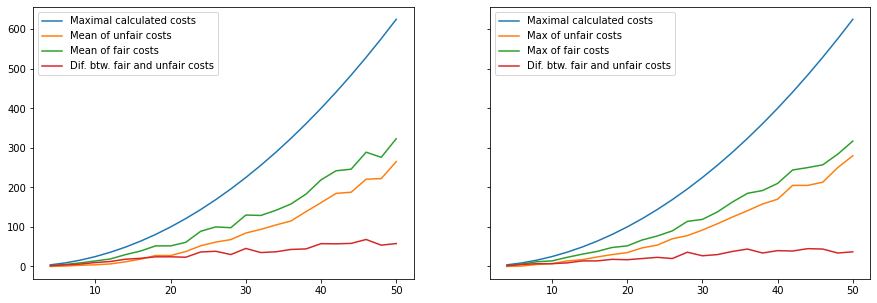

In [21]:
nodes = [i for i in range(4,51,2)]
max_calc_cost = [int(i**2/4) for i in range(4,51,2)]
mean_dif = [i-j for i,j in zip(fair_mean, unfair_mean)]
max_dif = [i-j for i,j in zip(fair_max, unfair_max)]

print('Nodes:       ', nodes)
print('Dif(max):    ', max_dif)
print('Unfair Mean: ', unfair_mean)
print('Unfair Max:  ', unfair_max)
print('Fair Mean:   ', fair_mean)
print('Fair Max:    ', fair_max)
print('Costs calc:  ', max_calc_cost)

# note:
# no use of the same graphs in max and mean!!
fig, ax = plt.subplots(1,2, figsize=(15,5), sharex=True, sharey=True)
ax[0].plot(nodes, max_calc_cost, label='Maximal calculated costs')
ax[0].plot(nodes, unfair_mean, label='Mean of unfair costs')
ax[0].plot(nodes, fair_mean, label='Mean of fair costs')
ax[0].plot(nodes, mean_dif, label='Dif. btw. fair and unfair costs')
ax[0].legend()
ax[1].plot(nodes, max_calc_cost, label='Maximal calculated costs')
ax[1].plot(nodes, unfair_max, label='Max of unfair costs')
ax[1].plot(nodes, fair_max, label='Max of fair costs')
ax[1].plot(nodes, max_dif, label='Dif. btw. fair and unfair costs')
ax[1].legend()
plt.show()

In [23]:
test = generate_incomplete_graph(5)

NameError: name 'generate_incomplete_graph' is not defined